### Q1. Mathematical Formula for a Linear SVM

For a linear SVM, the mathematical formula aims to find a hyperplane that separates the data into two classes with maximum margin. 

Given a dataset with \( n \) features, a linear SVM classifier finds a hyperplane defined by the equation:

\[ \mathbf{w}^\top \mathbf{x} + b = 0 \]

Where:
- \(\mathbf{w}\) is the weight vector perpendicular to the hyperplane.
- \(\mathbf{x}\) is a feature vector.
- \(b\) is the bias term.

The goal is to maximize the margin \( \frac{2}{\|\mathbf{w}\|} \) between the two classes.

### Q2. Objective Function of a Linear SVM

The objective function of a linear SVM is to maximize the margin between the classes while minimizing the classification error. This can be expressed as:

**Objective Function:**

\[ \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \]

**Subject to:**

\[ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 \text{ for all } i \]

Where:
- \( y_i \) is the label of the \( i \)-th training sample.
- \(\mathbf{x}_i\) is the feature vector of the \( i \)-th training sample.

This function ensures that the weight vector \( \mathbf{w} \) is chosen to maximize the margin while correctly classifying the training samples.

### Q3. The Kernel Trick in SVM

The kernel trick allows SVMs to operate in a higher-dimensional space without explicitly transforming the data into that space. It works by using a kernel function \( K(\mathbf{x}, \mathbf{x}') \) that computes the dot product in the higher-dimensional space implicitly.

Common kernel functions include:
- **Linear Kernel**: \( K(\mathbf{x}, \mathbf{x}') = \mathbf{x}^\top \mathbf{x}' \)
- **Polynomial Kernel**: \( K(\mathbf{x}, \mathbf{x}') = (\mathbf{x}^\top \mathbf{x}' + c)^d \)
- **Radial Basis Function (RBF) Kernel**: \( K(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|^2}{2\sigma^2}\right) \)

### Q4. Role of Support Vectors in SVM

Support vectors are the data points that lie closest to the hyperplane and are crucial for defining the margin. They are the only data points that influence the position and orientation of the hyperplane.

**Example:**

Consider a simple 2D case where two classes are separated by a hyperplane. The support vectors are the points from each class that are closest to the hyperplane. They are the critical elements in determining the decision boundary, and their removal would change the position of the hyperplane.

### Q5. Illustration with Examples and Graphs

Let’s illustrate the concepts of hyperplane, marginal plane, soft margin, and hard margin using graphs.

**1. Hyperplane and Marginal Planes:**
   - **Hyperplane**: Separates two classes in feature space.
   - **Marginal Planes**: Boundaries at distance \( \frac{1}{\|\mathbf{w}\|} \) from the hyperplane.

**2. Hard Margin vs. Soft Margin:**
   - **Hard Margin**: Assumes no misclassifications, works well with linearly separable data.
   - **Soft Margin**: Allows for some misclassifications to handle non-linearly separable data or noisy data.

Here’s how you might plot these using `matplotlib` and `numpy`:

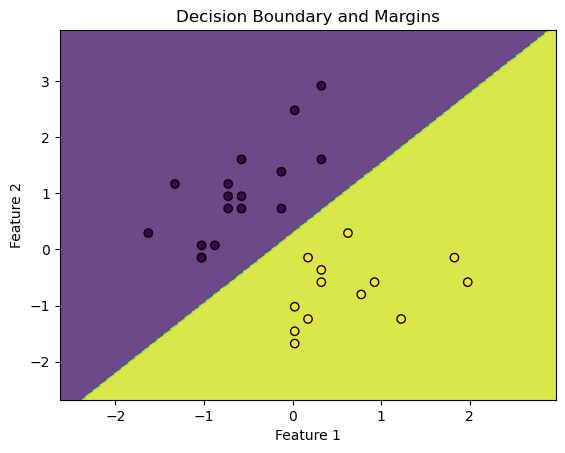

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only two features for easy visualization
y = iris.target

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary and Margins')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(clf, X_test, y_test)

**Soft Margin vs. Hard Margin:** 

- **Hard Margin**: Try a linear SVM with a large value of \( C \) to enforce no misclassifications.
- **Soft Margin**: Use a smaller \( C \) to allow some misclassifications and handle noisy data.

### Q6. SVM Implementation on Iris Dataset

Accuracy: 1.00


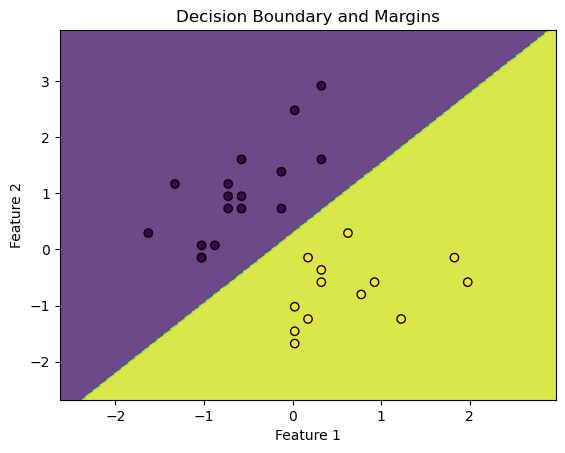

Accuracy with C=0.01: 1.00
Accuracy with C=0.1: 1.00
Accuracy with C=1: 1.00
Accuracy with C=10: 1.00
Accuracy with C=100: 1.00


In [2]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only two features for easy visualization
y = iris.target

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict and compute accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundaries
plot_decision_boundary(clf, X_test, y_test)

# Try different values of the regularization parameter C
for C in [0.01, 0.1, 1, 10, 100]:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy:.2f}")

### Bonus Task: Implement a Linear SVM Classifier from Scratch

Here’s a simplified version of implementing a linear SVM from scratch using Python:

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class LinearSVM:
    def __init__(self, learning_rate=0.01, n_iter=1000, C=1.0):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.C = C
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        y_ = np.where(y == 0, -1, 1)
        
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                if y_[idx] * (np.dot(x_i, self.w) + self.b) < 1:
                    self.w -= self.learning_rate * (2 * self.C * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * self.C * y_[idx]
                else:
                    self.w -= self.learning_rate * 2 * self.C * self.w
    
    def predict(self, X):
        return np.where(np.dot(X, self.w) + self.b >= 0, 1, 0)

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only two features
y = iris.target

# Use only two classes
X = X[y != 2]
y = y[y != 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the linear SVM
svm = LinearSVM()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Custom SVM Accuracy: {accuracy:.2f}")

# Compare with scikit-learn's SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}")


Custom SVM Accuracy: 0.57
Scikit-learn SVM Accuracy: 1.00


***Summary***
Mathematical Formula: Defines the hyperplane for linear SVM.
Objective Function: Minimizes the weight vector norm while ensuring correct classification.
Kernel Trick: Allows SVMs to operate in higher dimensions implicitly.
Support Vectors: Critical points that define the decision boundary.
Illustrations: Graphs of hyperplane, marginal planes, and different margins.
Iris Dataset: Implementation of SVM classification and performance evaluation.
Bonus Task: Implementing SVM from scratch and comparing with scikit-learn.
If you need further clarification or more details, feel free to ask!